In [2]:
import numpy as np
import scipy as sp
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

#import tensorflow as tf
#from tensorflow.keras.preprocessing.image import ImageDataGenerator
#from tensorflow.keras.applications import VGG16
#from tensorflow.keras import layers
#from tensorflow.keras import models
#from tensorflow.keras import regularizers,optimizers
#from keras.models import Sequential
#from tensorflow.keras.layers import Flatten
#from tensorflow.keras.layers import Dropout
#from tensorflow.keras.layers import Dense
#from tensorflow.keras.layers import Input
#from tensorflow.keras.models import Model
#from keras.layers import Conv2D, MaxPooling2D,Activation
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.utils import to_categorical
#from tensorflow.keras.preprocessing.image import img_to_array
#from tensorflow.keras.preprocessing.image import load_img
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
import pickle              # For saving models to disk and loading saved models
import os
import zipfile
import PIL
import PIL.Image
import pathlib
import cv2 as cv

In [3]:
# Initializing the random number generator
import random
random.seed(0)

# Ignoring the warnings
import warnings
warnings.filterwarnings("ignore")


In [4]:
path = 'C:/Users/uprak/capstone'
os.chdir(path)


In [5]:
ls

 Volume in drive C is Windows
 Volume Serial Number is D87D-3DAA

 Directory of C:\Users\uprak\capstone

07-12-2021  22:25    <DIR>          .
07-12-2021  22:25    <DIR>          ..
07-12-2021  17:05    <DIR>          .ipynb_checkpoints
07-12-2021  15:56    <DIR>          Annotations
07-12-2021  22:25         1,848,957 capstone_cv2.ipynb
07-12-2021  15:48    <DIR>          Car Images
07-12-2021  15:13             5,454 Car names and make.csv
07-12-2021  16:01         1,666,501 test.csv
07-12-2021  21:36         1,505,692 test1.csv
07-12-2021  16:01         1,696,197 train.csv
07-12-2021  22:17         7,129,237 train1.csv
               6 File(s)     13,852,038 bytes
               5 Dir(s)  96,047,706,112 bytes free


In [6]:
path1 = os.getcwd()
path1

'C:\\Users\\uprak\\capstone'

In [7]:
car_img_path = os.path.join(path1,'Car Images')
car_ann_path = os.path.join(path1,'Annotations')

In [8]:
ds_car_name = pd.read_csv("Car names and make.csv",names=['Car Name'])
ds_car_name

Car Name
0          AM General Hummer SUV 2000
1                 Acura RL Sedan 2012
2                 Acura TL Sedan 2012
3                Acura TL Type-S 2008
4                Acura TSX Sedan 2012
..                                ...
191  Volkswagen Beetle Hatchback 2012
192          Volvo C30 Hatchback 2012
193              Volvo 240 Sedan 1993
194               Volvo XC90 SUV 2007
195     smart fortwo Convertible 2012

[196 rows x 1 columns]

In [9]:
count = 0
car_dict = {}
for car_name in ds_car_name['Car Name'].values:
    car_dict[count+1] = car_name
    count=count+1
car_dict


{1: 'AM General Hummer SUV 2000',
 2: 'Acura RL Sedan 2012',
 3: 'Acura TL Sedan 2012',
 4: 'Acura TL Type-S 2008',
 5: 'Acura TSX Sedan 2012',
 6: 'Acura Integra Type R 2001',
 7: 'Acura ZDX Hatchback 2012',
 8: 'Aston Martin V8 Vantage Convertible 2012',
 9: 'Aston Martin V8 Vantage Coupe 2012',
 10: 'Aston Martin Virage Convertible 2012',
 11: 'Aston Martin Virage Coupe 2012',
 12: 'Audi RS 4 Convertible 2008',
 13: 'Audi A5 Coupe 2012',
 14: 'Audi TTS Coupe 2012',
 15: 'Audi R8 Coupe 2012',
 16: 'Audi V8 Sedan 1994',
 17: 'Audi 100 Sedan 1994',
 18: 'Audi 100 Wagon 1994',
 19: 'Audi TT Hatchback 2011',
 20: 'Audi S6 Sedan 2011',
 21: 'Audi S5 Convertible 2012',
 22: 'Audi S5 Coupe 2012',
 23: 'Audi S4 Sedan 2012',
 24: 'Audi S4 Sedan 2007',
 25: 'Audi TT RS Coupe 2012',
 26: 'BMW ActiveHybrid 5 Sedan 2012',
 27: 'BMW 1 Series Convertible 2012',
 28: 'BMW 1 Series Coupe 2012',
 29: 'BMW 3 Series Sedan 2012',
 30: 'BMW 3 Series Wagon 2012',
 31: 'BMW 6 Series Convertible 2007',
 32: 

In [10]:
train_img_dir = os.path.join(car_img_path,'Train Images')
test_img_dir =  os.path.join(car_img_path,'Test Images')

In [11]:
ds_train_ann = pd.read_csv(os.path.join(car_ann_path,'Train Annotations.csv'),names=['Image_Name','Start_x','Start_y','End_x','End_y','Image_class'])
ds_test_ann = pd.read_csv(os.path.join(car_ann_path,'Test Annotation.csv'),names=['Image_Name','Start_x','Start_y','End_x','End_y','Image_class'])

In [12]:
ds_train_ann.drop([ds_train_ann.index[0]],inplace=True)
ds_test_ann.drop([ds_test_ann.index[0]],inplace=True)

In [13]:
ds_train_ann.reset_index(inplace=True,drop=True)
ds_test_ann.reset_index(inplace=True,drop=True)
ds_train_ann.head(5)

Image_Name Start_x  Start_y   End_x   End_y Image_class
0  00001.jpg      39    116.0   569.0   375.0          14
1  00002.jpg      36    116.0   868.0   587.0           3
2  00003.jpg      85    109.0   601.0   381.0          91
3  00004.jpg     621    393.0  1484.0  1096.0         134
4  00005.jpg      14     36.0   133.0    99.0         106

<AxesSubplot:xlabel='Image_class', ylabel='Count'>

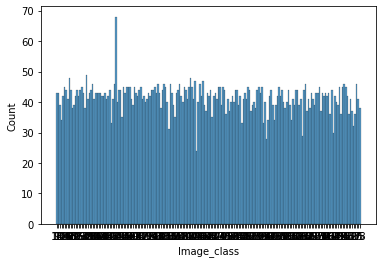

In [14]:
sns.histplot(data=ds_train_ann,x='Image_class',discrete=True)

<AxesSubplot:xlabel='Image_class', ylabel='Count'>

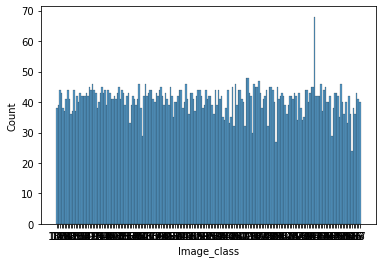

In [15]:
sns.histplot(data=ds_test_ann,x='Image_class',discrete=True)

In [138]:
ds_train_ann[ds_train_ann.duplicated() == True]

Empty DataFrame
Columns: [Image_Name, Start_x, Start_y, End_x, End_y, Image_class]
Index: []

In [ ]:
def load_images_from_folder(folder):
    #file_name = []
    file_path = {}
    count = 0
    for folders in os.listdir(folder):
        #print(folders)
        if folders == '.DS_Store':
            pass
        else:
            foldername = os.path.join(folder,folders)
            #print(foldername)
            for filename in os.listdir(foldername):
                count = count+1
                filepath = os.path.join(foldername,filename)
                #file_name.append(filename)
                file_path[filename]=filepath
                #print(filename)
    return file_path

In [140]:
train_images_path = load_images_from_folder(train_img_dir)
test_images_path = load_images_from_folder(test_img_dir)
ds_train_ann['Image_Path'] = ds_train_ann['Image_Name'].apply(lambda x:train_images_path[x])
ds_train_ann['Car_Name'] = ds_train_ann['Image_class'].apply(lambda x:car_dict[int(x)])
ds_train_ann['Start_x'] = ds_train_ann.Start_x.astype(float)
ds_train_ann['Image_class'] = ds_train_ann.Image_class.astype(int)
ds_train_ann['Bbox'] = ds_train_ann.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
ds_test_ann['Image_Path'] = ds_test_ann['Image_Name'].apply(lambda x:test_images_path[x])
ds_test_ann['Start_x'] = ds_test_ann.Start_x.astype(float)
ds_test_ann['Image_class'] = ds_test_ann.Image_class.astype(int)
ds_test_ann['Car_Name'] = ds_test_ann['Image_class'].apply(lambda x:car_dict[int(x)])
ds_test_ann['Bbox'] = ds_test_ann.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)

In [141]:
ds_train_ann


Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0     00001.jpg     39.0    116.0   569.0   375.0           14   
1     00002.jpg     36.0    116.0   868.0   587.0            3   
2     00003.jpg     85.0    109.0   601.0   381.0           91   
3     00004.jpg    621.0    393.0  1484.0  1096.0          134   
4     00005.jpg     14.0     36.0   133.0    99.0          106   
...         ...      ...      ...     ...     ...          ...   
8139  08140.jpg      3.0     44.0   423.0   336.0           78   
8140  08141.jpg    138.0    150.0   706.0   523.0          196   
8141  08142.jpg     26.0    246.0   660.0   449.0          163   
8142  08143.jpg     78.0    526.0  1489.0   908.0          112   
8143  08144.jpg     20.0    240.0   862.0   677.0           17   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Train Image...   
1     C:\Users\uprak\capstone\Car Images\Train Image...   
2     C:\Users\uprak\capstone\Car Images\Train Image...   
3     C:\Users\uprak\capstone\Car Images\Train Image...   
4     C:\Users\uprak\capstone\Car Images\Train Image...   
...                                                 ...   
8139  C:\Users\uprak\capstone\Car Images\Train Image...   
8140  C:\Users\uprak\capstone\Car Images\Train Image...   
8141  C:\Users\uprak\capstone\Car Images\Train Image...   
8142  C:\Users\uprak\capstone\Car Images\Train Image...   
8143  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                            Bbox  
0                        Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]  
1                        Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]  
2                 Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]  
3           Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]  
4        Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]  
...                                      ...                             ...  
8139  Chrysler Town and Country Minivan 2012       [3.0, 44.0, 423.0, 336.0]  
8140           smart fortwo Convertible 2012    [138.0, 150.0, 706.0, 523.0]  
8141       Mercedes-Benz SL-Class Coupe 2009     [26.0, 246.0, 660.0, 449.0]  
8142                      Ford GT Coupe 2006    [78.0, 526.0, 1489.0, 908.0]  
8143                     Audi 100 Sedan 1994     [20.0, 240.0, 862.0, 677.0]  

[8144 rows x 9 columns]

In [142]:
def get_image_dims(df,col):
    height = []
    width = []
    for img_path in df[col].values:
        img = cv.imread(img_path)
        height.append(int(img.shape[0]))
        width.append(int(img.shape[1]))
    return height,width

ds_train_ann['Orig_img_height'],ds_train_ann['Orig_img_width'] =  get_image_dims(ds_train_ann,'Image_Path')
ds_test_ann['Orig_img_height'],ds_test_ann['Orig_img_width'] =  get_image_dims(ds_test_ann,'Image_Path')

In [143]:
ds_train_ann

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0     00001.jpg     39.0    116.0   569.0   375.0           14   
1     00002.jpg     36.0    116.0   868.0   587.0            3   
2     00003.jpg     85.0    109.0   601.0   381.0           91   
3     00004.jpg    621.0    393.0  1484.0  1096.0          134   
4     00005.jpg     14.0     36.0   133.0    99.0          106   
...         ...      ...      ...     ...     ...          ...   
8139  08140.jpg      3.0     44.0   423.0   336.0           78   
8140  08141.jpg    138.0    150.0   706.0   523.0          196   
8141  08142.jpg     26.0    246.0   660.0   449.0          163   
8142  08143.jpg     78.0    526.0  1489.0   908.0          112   
8143  08144.jpg     20.0    240.0   862.0   677.0           17   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Train Image...   
1     C:\Users\uprak\capstone\Car Images\Train Image...   
2     C:\Users\uprak\capstone\Car Images\Train Image...   
3     C:\Users\uprak\capstone\Car Images\Train Image...   
4     C:\Users\uprak\capstone\Car Images\Train Image...   
...                                                 ...   
8139  C:\Users\uprak\capstone\Car Images\Train Image...   
8140  C:\Users\uprak\capstone\Car Images\Train Image...   
8141  C:\Users\uprak\capstone\Car Images\Train Image...   
8142  C:\Users\uprak\capstone\Car Images\Train Image...   
8143  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                            Bbox  \
0                        Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                        Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2                 Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3           Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4        Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   
...                                      ...                             ...   
8139  Chrysler Town and Country Minivan 2012       [3.0, 44.0, 423.0, 336.0]   
8140           smart fortwo Convertible 2012    [138.0, 150.0, 706.0, 523.0]   
8141       Mercedes-Benz SL-Class Coupe 2009     [26.0, 246.0, 660.0, 449.0]   
8142                      Ford GT Coupe 2006    [78.0, 526.0, 1489.0, 908.0]   
8143                     Audi 100 Sedan 1994     [20.0, 240.0, 862.0, 677.0]   

      Orig_img_height  Orig_img_width  
0                 400             600  
1                 675             900  
2                 480             640  
3                1386            2100  
4                 108             144  
...               ...             ...  
8139              360             424  
8140              600             800  
8141              469             750  
8142             1067            1600  
8143              683             883  

[8144 rows x 11 columns]

In [147]:
ds_train_ann.to_csv("train1.csv", index=False)

In [148]:
ds_test_ann.to_csv("test1.csv",index=False)

In [26]:
df_train = pd.read_csv("train1.csv")
df_test = pd.read_csv("test1.csv")

In [27]:
df_train.sample(10)

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
5723  05724.jpg      1.0     66.0   700.0  480.0           73   
605   00606.jpg     99.0     72.0   894.0  675.0           98   
7850  07851.jpg     77.0    277.0  1160.0  763.0          164   
5901  05902.jpg     60.0     82.0   338.0  221.0           25   
5910  05911.jpg     40.0     37.0   590.0  377.0           78   
2357  02358.jpg     51.0     38.0   603.0  432.0          169   
3637  03638.jpg     37.0    226.0   959.0  554.0           66   
3640  03641.jpg    118.0     78.0   599.0  419.0            5   
1567  01568.jpg     16.0      9.0   618.0  414.0           37   
6974  06975.jpg     95.0     87.0   961.0  702.0          154   

                                             Image_Path  \
5723  C:\Users\uprak\capstone\Car Images\Train Image...   
605   C:\Users\uprak\capstone\Car Images\Train Image...   
7850  C:\Users\uprak\capstone\Car Images\Train Image...   
5901  C:\Users\uprak\capstone\Car Images\Train Image...   
5910  C:\Users\uprak\capstone\Car Images\Train Image...   
2357  C:\Users\uprak\capstone\Car Images\Train Image...   
3637  C:\Users\uprak\capstone\Car Images\Train Image...   
3640  C:\Users\uprak\capstone\Car Images\Train Image...   
1567  C:\Users\uprak\capstone\Car Images\Train Image...   
6974  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                          Bbox  \
5723             Chevrolet Malibu Sedan 2007     [1.0, 66.0, 700.0, 480.0]   
605               Eagle Talon Hatchback 1998    [99.0, 72.0, 894.0, 675.0]   
7850        Mercedes-Benz E-Class Sedan 2012  [77.0, 277.0, 1160.0, 763.0]   
5901                   Audi TT RS Coupe 2012    [60.0, 82.0, 338.0, 221.0]   
5910  Chrysler Town and Country Minivan 2012    [40.0, 37.0, 590.0, 377.0]   
2357            Nissan NV Passenger Van 2012    [51.0, 38.0, 603.0, 432.0]   
3637                Chevrolet Cobalt SS 2010   [37.0, 226.0, 959.0, 554.0]   
3640                    Acura TSX Sedan 2012   [118.0, 78.0, 599.0, 419.0]   
1567                         BMW X3 SUV 2012     [16.0, 9.0, 618.0, 414.0]   
6974         Land Rover Range Rover SUV 2012    [95.0, 87.0, 961.0, 702.0]   

      Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height  \
5723              500             700  1.400000     699.0      414.0   
605               768            1024  1.333333     795.0      603.0   
7850              782            1280  1.636829    1083.0      486.0   
5901              268             400  1.492537     278.0      139.0   
5910              427             640  1.498829     550.0      340.0   
2357              480             640  1.333333     552.0      394.0   
3637              768            1024  1.333333     922.0      328.0   
3640              480             640  1.333333     481.0      341.0   
1567              420             630  1.500000     602.0      405.0   
6974              768            1024  1.333333     866.0      615.0   

         bb_AR  img_area   bb_area  \
5723  1.688406    350000  289386.0   
605   1.318408    786432  479385.0   
7850  2.228395   1000960  526338.0   
5901  2.000000    107200   38642.0   
5910  1.617647    273280  187000.0   
2357  1.401015    307200  217488.0   
3637  2.810976    786432  302416.0   
3640  1.410557    307200  164021.0   
1567  1.486420    264600  243810.0   
6974  1.408130    786432  532590.0   

                                                 Images  
5723  [[[ 79  98 115]\n  [ 81 100 117]\n  [ 76  95 1...  
605   [[[162 182 217]\n  [158 178 213]\n  [160 178 2...  
7850  [[[179 122  69]\n  [183 128  74]\n  [190 134  ...  
5901  [[[ 23  30  14]\n  [ 45  52  36]\n  [ 41  45  ...  
5910  [[[183 203 214]\n  [185 205 216]\n  [184 204 2...  
2357  [[[ 53  57  56]\n  [ 55  59  58]\n  [ 57  61  ...  
3637  [[[115 115  55]\n  [ 62  62   2]\n  [ 54  53  ...  
3640  [[[255 255 250]\n  [255 255 250]\n  [255 255 2...  
1567  [[[121 130 139]\n  [128 137 146]\n  [136

In [28]:
#df_train['Img_AR'] = df_train['Orig_img_width']/df_train['Orig_img_height']
#df_train['bb_width'] = df_train['End_x'] - df_train['Start_x']
#df_train['bb_height'] = df_train['End_y'] - df_train['Start_y']
#df_train['bb_AR'] = df_train['bb_width']/df_train['bb_height']

In [29]:
#df_test['Img_AR'] = df_test['Orig_img_width']/df_test['Orig_img_height']
#df_test['bb_width'] = df_test['End_x'] - df_test['Start_x']
#df_test['bb_height'] = df_test['End_y'] - df_test['Start_y']
#df_test['bb_AR'] = df_test['bb_width']/df_test['bb_height']

In [30]:
df_train.sample(5)

Image_Name  Start_x  Start_y  End_x  End_y  Image_class  \
969   00970.jpg     23.0     27.0  555.0  326.0           52   
5978  05979.jpg     73.0     86.0  441.0  306.0            4   
97    00098.jpg     65.0     37.0  578.0  360.0           51   
487   00488.jpg     28.0     35.0  207.0  139.0           56   
1210  01211.jpg     23.0     21.0  235.0  176.0          108   

                                             Image_Path  \
969   C:\Users\uprak\capstone\Car Images\Train Image...   
5978  C:\Users\uprak\capstone\Car Images\Train Image...   
97    C:\Users\uprak\capstone\Car Images\Train Image...   
487   C:\Users\uprak\capstone\Car Images\Train Image...   
1210  C:\Users\uprak\capstone\Car Images\Train Image...   

                         Car_Name                        Bbox  \
969         Cadillac SRX SUV 2012  [23.0, 27.0, 555.0, 326.0]   
5978         Acura TL Type-S 2008  [73.0, 86.0, 441.0, 306.0]   
97      Cadillac CTS-V Sedan 2012  [65.0, 37.0, 578.0, 360.0]   
487   Chevrolet Corvette ZR1 2012  [28.0, 35.0, 207.0, 139.0]   
1210   Ford Freestar Minivan 2007  [23.0, 21.0, 235.0, 176.0]   

      Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height  \
969               480             640  1.333333     532.0      299.0   
5978              375             500  1.333333     368.0      220.0   
97                426             640  1.502347     513.0      323.0   
487               199             300  1.507538     179.0      104.0   
1210              198             264  1.333333     212.0      155.0   

         bb_AR  img_area   bb_area  \
969   1.779264    307200  159068.0   
5978  1.672727    187500   80960.0   
97    1.588235    272640  165699.0   
487   1.721154     59700   18616.0   
1210  1.367742     52272   32860.0   

                                                 Images  
969   [[[ 42  48  38]\n  [ 41  47  37]\n  [ 42  48  ...  
5978  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...  
97    [[[242 242 242]\n  [246 246 246]\n  [245 245 2...  
487   [[[172 158 121]\n  [171 157 120]\n  [171 155 1...  
1210  [[[249 250 252]\n  [244 245 247]\n  [240 241 2...

In [31]:
#df_train['img_area'] = df_train['Orig_img_width']*df_train['Orig_img_height']
#df_train['bb_area'] = df_train['bb_width'] * df_train['bb_height']
#df_test['img_area'] = df_test['Orig_img_width']*df_test['Orig_img_height']
#df_test['bb_area'] = df_test['bb_width'] * df_test['bb_height']

In [32]:
#df_train.sample(5)

In [33]:
cols = list(df_train.columns)
cols

['Image_Name',
 'Start_x',
 'Start_y',
 'End_x',
 'End_y',
 'Image_class',
 'Image_Path',
 'Car_Name',
 'Bbox',
 'Orig_img_height',
 'Orig_img_width',
 'Img_AR',
 'bb_width',
 'bb_height',
 'bb_AR',
 'img_area',
 'bb_area',
 'Images']

In [35]:
df_test.columns

Index(['Image_Name', 'Start_x', 'Start_y', 'End_x', 'End_y', 'Image_class',
       'Image_Path', 'Car_Name', 'Bbox', 'Orig_img_height', 'Orig_img_width',
       'Images'],
      dtype='object')

In [36]:
df_test

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
0     00001.jpg     30.0     52.0   246.0  147.0          181   
1     00002.jpg    100.0     19.0   576.0  203.0          103   
2     00003.jpg     51.0    105.0   968.0  659.0          145   
3     00004.jpg     67.0     84.0   581.0  407.0          187   
4     00005.jpg    140.0    151.0   593.0  339.0          185   
...         ...      ...      ...     ...    ...          ...   
8036  08037.jpg     49.0     57.0  1169.0  669.0           63   
8037  08038.jpg     23.0     18.0   640.0  459.0           16   
8038  08039.jpg     33.0     27.0   602.0  252.0           17   
8039  08040.jpg     33.0    142.0   521.0  376.0           38   
8040  08041.jpg     77.0     73.0   506.0  380.0           32   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Test Images...   
1     C:\Users\uprak\capstone\Car Images\Test Images...   
2     C:\Users\uprak\capstone\Car Images\Test Images...   
3     C:\Users\uprak\capstone\Car Images\Test Images...   
4     C:\Users\uprak\capstone\Car Images\Test Images...   
...                                                 ...   
8036  C:\Users\uprak\capstone\Car Images\Test Images...   
8037  C:\Users\uprak\capstone\Car Images\Test Images...   
8038  C:\Users\uprak\capstone\Car Images\Test Images...   
8039  C:\Users\uprak\capstone\Car Images\Test Images...   
8040  C:\Users\uprak\capstone\Car Images\Test Images...   

                                 Car_Name                          Bbox  \
0                 Suzuki Aerio Sedan 2007    [30.0, 52.0, 246.0, 147.0]   
1     Ferrari 458 Italia Convertible 2012   [100.0, 19.0, 576.0, 203.0]   
2                   Jeep Patriot SUV 2012   [51.0, 105.0, 968.0, 659.0]   
3                 Toyota Camry Sedan 2012    [67.0, 84.0, 581.0, 407.0]   
4                Tesla Model S Sedan 2012  [140.0, 151.0, 593.0, 339.0]   
...                                   ...                           ...   
8036           Chevrolet Sonic Sedan 2012   [49.0, 57.0, 1169.0, 669.0]   
8037                   Audi V8 Sedan 1994    [23.0, 18.0, 640.0, 459.0]   
8038                  Audi 100 Sedan 1994    [33.0, 27.0, 602.0, 252.0]   
8039              BMW Z4 Convertible 2012   [33.0, 142.0, 521.0, 376.0]   
8040                      BMW X5 SUV 2007    [77.0, 73.0, 506.0, 380.0]   

      Orig_img_height  Orig_img_width  \
0                 182             276   
1                 360             640   
2                 741            1024   
3                 480             640   
4                 373             600   
...               ...             ...   
8036              800            1200   
8037              480             640   
8038              303             635   
8039              427             640   
8040              426             640   

                                                 Images  
0     [[[254 254 254]\n  [254 254 254]\n  [254 254 2...  
1     [[[126 122 119]\n  [124 120 117]\n  [121 117 1...  
2     [[[161 160 166]\n  [159 158 164]\n  [157 156 1...  
3     [[[ 21  21  21]\n  [ 24  24  24]\n  [ 22  22  ...  
4     [[[254 254 242]\n  [254 254 242]\n  [254 254 2...  
...                                                 ...  
8036  [[[ 93  77  77]\n  [ 92  76  76]\n  [ 91  75  ...  
8037  [[[ 54  51  42]\n  [ 50  47  38]\n  [ 51  48  ...  
8038  [[[122  83  54]\n  [112  75  46]\n  [120  83  ...  
8039  [[[ 74  61  44]\n  [ 74  61  44]\n  [ 74  61  ...  
8040  [[[ 39  39  31]\n  [ 71  71  63]\n  [ 45  45  ...  

[8041 rows x 12 columns]

In [37]:
df_test.sample(5)

Image_Name  Start_x  Start_y  End_x  End_y  Image_class  \
2098  02099.jpg     36.0     99.0  967.0  610.0           13   
5208  05209.jpg     26.0     61.0  283.0  198.0           13   
150   00151.jpg     47.0     27.0  602.0  390.0           81   
7735  07736.jpg     67.0    143.0  444.0  344.0           70   
5488  05489.jpg    109.0    112.0  690.0  446.0          152   

                                             Image_Path  \
2098  C:\Users\uprak\capstone\Car Images\Test Images...   
5208  C:\Users\uprak\capstone\Car Images\Test Images...   
150   C:\Users\uprak\capstone\Car Images\Test Images...   
7735  C:\Users\uprak\capstone\Car Images\Test Images...   
5488  C:\Users\uprak\capstone\Car Images\Test Images...   

                                               Car_Name  \
2098                                 Audi A5 Coupe 2012   
5208                                 Audi A5 Coupe 2012   
150                Chrysler PT Cruiser Convertible 2008   
7735  Chevrolet Silverado 1500 Classic Extended Cab ...   
5488    Lamborghini Gallardo LP 570-4 Superleggera 2012   

                              Bbox  Orig_img_height  Orig_img_width  \
2098    [36.0, 99.0, 967.0, 610.0]              768            1024   
5208    [26.0, 61.0, 283.0, 198.0]              225             300   
150     [47.0, 27.0, 602.0, 390.0]              480             640   
7735   [67.0, 143.0, 444.0, 344.0]              360             480   
5488  [109.0, 112.0, 690.0, 446.0]              492             786   

                                                 Images  
2098  [[[ 93  95  94]\n  [ 91  93  92]\n  [ 90  91  ...  
5208  [[[205  41  32]\n  [205  41  32]\n  [204  40  ...  
150   [[[15 17 16]\n  [14 16 15]\n  [15 17 16]\n  .....  
7735  [[[126 171 194]\n  [128 173 196]\n  [131 176 1...  
5488  [[[117 149 190]\n  [116 148 189]\n  [118 147 1...

In [38]:
df_group = df_train.groupby(by=['Image_class']).mean()

In [39]:
df_group

Start_x     Start_y       End_x       End_y  Orig_img_height  \
Image_class                                                                    
1             33.355556   67.333333  449.688889  306.000000       338.777778   
2             69.718750  113.250000  633.250000  380.281250       444.343750   
3             63.953488   99.046512  657.558140  419.860465       482.976744   
4             50.380952  131.261905  673.285714  435.357143       505.428571   
5             47.195122   95.853659  486.926829  313.414634       370.536585   
...                 ...         ...         ...         ...              ...   
192          116.395349  163.162791  912.906977  600.930233       699.348837   
193           83.833333  113.166667  693.047619  454.404762       517.261905   
194           84.391304  123.260870  787.304348  485.195652       566.913043   
195           54.674419   74.581395  550.883721  367.627907       409.813953   
196           62.750000   70.550000  553.850000  391.575000       426.250000   

             Orig_img_width    Img_AR    bb_width   bb_height     bb_AR  \
Image_class                                                               
1                491.133333  1.488229  416.333333  238.666667  1.733447   
2                694.250000  1.626136  563.531250  267.031250  2.193562   
3                714.046512  1.490232  593.604651  320.813953  1.999234   
4                720.023810  1.427891  622.904762  304.095238  2.079940   
5                529.878049  1.467877  439.731707  217.560976  2.016969   
...                     ...       ...         ...         ...       ...   
192             1021.767442  1.480585  796.511628  437.767442  1.924556   
193              778.547619  1.541277  609.214286  341.238095  1.873040   
194              837.391304  1.539087  702.913043  361.934783  2.088240   
195              595.023256  1.478335  496.209302  293.046512  1.713090   
196              623.525000  1.462446  491.100000  321.025000  1.526207   

                  img_area        bb_area  
Image_class                                
1            339422.000000  185725.533333  
2            421385.937500  192106.718750  
3            510487.860465  294358.186047  
4            416349.880952  211456.714286  
5            346084.951220  169860.097561  
...                    ...            ...  
192          825807.209302  433913.860465  
193          487950.666667  241788.619048  
194          537252.239130  285973.065217  
195          288334.674419  171179.627907  
196          373605.325000  218841.350000  

[196 rows x 12 columns]

In [40]:
df_group.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196 entries, 1 to 196
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Start_x          196 non-null    float64
 1   Start_y          196 non-null    float64
 2   End_x            196 non-null    float64
 3   End_y            196 non-null    float64
 4   Orig_img_height  196 non-null    float64
 5   Orig_img_width   196 non-null    float64
 6   Img_AR           196 non-null    float64
 7   bb_width         196 non-null    float64
 8   bb_height        196 non-null    float64
 9   bb_AR            196 non-null    float64
 10  img_area         196 non-null    float64
 11  bb_area          196 non-null    float64
dtypes: float64(12)
memory usage: 19.9 KB


In [41]:
df_group.describe().transpose()

count           mean            std            min  \
Start_x          196.0      64.969904      28.874050      22.813953   
Start_y          196.0     108.318143      37.164405      39.025000   
End_x            196.0     634.928421     172.482091     317.275000   
End_y            196.0     414.032831     117.179856     229.000000   
Orig_img_height  196.0     479.946622     135.123858     252.225000   
Orig_img_width   196.0     696.466378     194.958120     349.500000   
Img_AR           196.0       1.475325       0.062479       1.340796   
bb_width         196.0     569.958517     150.505356     285.575000   
bb_height        196.0     305.714688      90.111618     169.750000   
bb_AR            196.0       1.953022       0.200483       1.374284   
img_area         196.0  471668.232939  282418.224726  130582.125000   
bb_area          196.0  246246.701083  153703.305672   68165.500000   

                           25%            50%            75%           max  
Start_x              42.609226      57.319580      77.561163  1.846591e+02  
Start_y              83.025877     101.064857     127.836051  2.608182e+02  
End_x               514.339039     609.108935     701.699275  1.431727e+03  
End_y               333.580952     391.145105     464.607919  9.897955e+02  
Orig_img_height     386.267970     453.641026     529.396959  1.140000e+03  
Orig_img_width      562.917930     665.098930     771.282998  1.579250e+03  
Img_AR                1.427664       1.474263       1.516778  1.694495e+00  
bb_width            467.374492     549.422025     627.529194  1.247068e+03  
bb_height           247.029167     286.353309     338.530454  7.435682e+02  
bb_AR                 1.817158       1.943708       2.089676  2.441710e+00  
img_area         298792.795094  402777.703523  543557.405098  1.922553e+06  
bb_area          150833.660714  203522.201252  289702.911364  1.115018e+06

In [42]:
df_train.head(10)

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0  00001.jpg     39.0    116.0   569.0   375.0           14   
1  00002.jpg     36.0    116.0   868.0   587.0            3   
2  00003.jpg     85.0    109.0   601.0   381.0           91   
3  00004.jpg    621.0    393.0  1484.0  1096.0          134   
4  00005.jpg     14.0     36.0   133.0    99.0          106   
5  00006.jpg    259.0    289.0   515.0   416.0          123   
6  00007.jpg     88.0     80.0   541.0   397.0           89   
7  00008.jpg     73.0     79.0   591.0   410.0           96   
8  00009.jpg     20.0    126.0  1269.0   771.0          167   
9  00010.jpg     21.0    110.0   623.0   367.0           58   

                                          Image_Path  \
0  C:\Users\uprak\capstone\Car Images\Train Image...   
1  C:\Users\uprak\capstone\Car Images\Train Image...   
2  C:\Users\uprak\capstone\Car Images\Train Image...   
3  C:\Users\uprak\capstone\Car Images\Train Image...   
4  C:\Users\uprak\capstone\Car Images\Train Image...   
5  C:\Users\uprak\capstone\Car Images\Train Image...   
6  C:\Users\uprak\capstone\Car Images\Train Image...   
7  C:\Users\uprak\capstone\Car Images\Train Image...   
8  C:\Users\uprak\capstone\Car Images\Train Image...   
9  C:\Users\uprak\capstone\Car Images\Train Image...   

                              Car_Name                            Bbox  \
0                  Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                  Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2           Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3     Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4  Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   
5           Geo Metro Convertible 1993    [259.0, 289.0, 515.0, 416.0]   
6               Dodge Journey SUV 2012      [88.0, 80.0, 541.0, 397.0]   
7             Dodge Charger Sedan 2012      [73.0, 79.0, 591.0, 410.0]   
8         Mitsubishi Lancer Sedan 2012    [20.0, 126.0, 1269.0, 771.0]   
9          Chevrolet Traverse SUV 2012     [21.0, 110.0, 623.0, 367.0]   

   Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height     bb_AR  \
0              400             600  1.500000     530.0      259.0  2.046332   
1              675             900  1.333333     832.0      471.0  1.766454   
2              480             640  1.333333     516.0      272.0  1.897059   
3             1386            2100  1.515152     863.0      703.0  1.227596   
4              108             144  1.333333     119.0       63.0  1.888889   
5              431             575  1.334107     256.0      127.0  2.015748   
6              480             640  1.333333     453.0      317.0  1.429022   
7              480             639  1.331250     518.0      331.0  1.564955   
8              843            1280  1.518387    1249.0      645.0  1.936434   
9              480             640  1.333333     602.0      257.0  2.342412   

   img_area   bb_area                                             Images  
0    240000  137270.0  [[[101 119 123]\n  [ 98 116 120]\n  [ 93 111 1...  
1    607500  391872.0  [[[164 169 175]\n  [166 171 177]\n  [169 174 1...  
2    307200  140352.0  [[[231 231 231]\n  [244 244 244]\n  [234 234 2...  
3   2910600  606689.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...  
4     15552    7497.0  [[[136 167 196]\n  [136 167 196]\n  [138 169 1...  
5    247825   32512.0  [[[161 183 241]\n  [161 183 241]\n  [161 183 2...  
6    307200  143601.0  [[[ 40  44  47]\n  [ 40  44  47]\n  [ 40  44  ...  
7    306720  171458.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...  
8   1079040  805605.0  [[[103 106  99]\n  [ 81  76  72]\n  [115 104 1...  
9    307200  154714.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...

In [43]:
df_train.describe().transpose()

count           mean            std          min  \
Start_x          8144.0      64.906803      82.198684     1.000000   
Start_y          8144.0     108.661223     104.551635     1.000000   
End_x            8144.0     638.208620     410.776734    76.000000   
End_y            8144.0     416.431606     273.786000    47.000000   
Image_class      8144.0      98.979371      56.503148     1.000000   
Orig_img_height  8144.0     482.771979     317.580021    57.000000   
Orig_img_width   8144.0     699.793099     450.922445    78.000000   
Img_AR           8144.0       1.473561       0.232987     0.593066   
bb_width         8144.0     573.301817     375.675050    73.000000   
bb_height        8144.0     307.770383     213.463238    23.000000   
bb_AR            8144.0       1.951161       0.488941     0.559322   
img_area         8144.0  477026.917117  890130.689330  4524.000000   
bb_area          8144.0  249462.668713  494907.035699  1748.000000   

                           25%            50%            75%           max  
Start_x              19.000000      39.000000      79.000000  1.648000e+03  
Start_y              42.000000      80.000000     138.250000  1.508000e+03  
End_x               392.000000     569.000000     746.250000  5.205000e+03  
End_y               248.000000     360.000000     477.000000  3.389000e+03  
Image_class          50.000000      99.000000     148.000000  1.960000e+02  
Orig_img_height     290.000000     424.000000     540.000000  3.744000e+03  
Orig_img_width      429.000000     636.500000     800.000000  5.616000e+03  
Img_AR                1.333333       1.348485       1.519757  3.887538e+00  
bb_width            338.000000     504.000000     659.000000  4.156000e+03  
bb_height           173.000000     260.000000     370.000000  2.648000e+03  
bb_AR                 1.593023       1.867606       2.249385  3.975000e+00  
img_area         121240.000000  265752.000000  432363.750000  2.102630e+07  
bb_area           59735.000000  130497.000000  237495.750000  9.874656e+06

In [44]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8144 entries, 0 to 8143
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Image_Name       8144 non-null   object 
 1   Start_x          8144 non-null   float64
 2   Start_y          8144 non-null   float64
 3   End_x            8144 non-null   float64
 4   End_y            8144 non-null   float64
 5   Image_class      8144 non-null   int64  
 6   Image_Path       8144 non-null   object 
 7   Car_Name         8144 non-null   object 
 8   Bbox             8144 non-null   object 
 9   Orig_img_height  8144 non-null   int64  
 10  Orig_img_width   8144 non-null   int64  
 11  Img_AR           8144 non-null   float64
 12  bb_width         8144 non-null   float64
 13  bb_height        8144 non-null   float64
 14  bb_AR            8144 non-null   float64
 15  img_area         8144 non-null   int64  
 16  bb_area          8144 non-null   float64
 17  Images        

In [45]:
df_train[df_train['Orig_img_height'].isna()]

Empty DataFrame
Columns: [Image_Name, Start_x, Start_y, End_x, End_y, Image_class, Image_Path, Car_Name, Bbox, Orig_img_height, Orig_img_width, Img_AR, bb_width, bb_height, bb_AR, img_area, bb_area, Images]
Index: []

In [20]:
def read_image(path):
    im = cv.imread(str(path))
    return cv.cvtColor(im, cv.COLOR_BGR2RGB)

#image_paths = list(df_train['Image_Path']) 
#images = [read_image(p) for p in image_paths]

In [172]:
#df_train['Images'] = images

In [174]:
#df_train.to_csv("train1.csv", index=False)

In [21]:
#image_paths = list(df_test['Image_Path']) 
#images = [read_image(p) for p in image_paths]

In [22]:
#df_test['Images'] = images

In [46]:
#df_test.to_csv("test1.csv", index=False)

In [63]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=2):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, x_max, y_max = map(int,bbox)
    cv.rectangle(img, (x_min, y_min), (x_max, y_max), color=BOX_COLOR, thickness=thickness)
    
    ((text_width, text_height), _) = cv.getTextSize(class_name, cv.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv.rectangle(img, (x_min, (y_min - int(0.3 * text_height))), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv.LINE_AA,
    )
    return img


def visualize(image_list, bbox_list, class_list):
    count = 0
    image_final = []
    for images in image_list:
        #print(img)
        bbox = bbox_list[count]
        #print(bbox)
        class_name = class_list[count]
        #print(class_name)
        img = visualize_bbox(images, bbox, class_name)
        image_final.append(img)
        count = count + 1
    return image_final

In [66]:
df_train['Bbox'] = df_train.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_train

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0     00001.jpg     39.0    116.0   569.0   375.0           14   
1     00002.jpg     36.0    116.0   868.0   587.0            3   
2     00003.jpg     85.0    109.0   601.0   381.0           91   
3     00004.jpg    621.0    393.0  1484.0  1096.0          134   
4     00005.jpg     14.0     36.0   133.0    99.0          106   
...         ...      ...      ...     ...     ...          ...   
8139  08140.jpg      3.0     44.0   423.0   336.0           78   
8140  08141.jpg    138.0    150.0   706.0   523.0          196   
8141  08142.jpg     26.0    246.0   660.0   449.0          163   
8142  08143.jpg     78.0    526.0  1489.0   908.0          112   
8143  08144.jpg     20.0    240.0   862.0   677.0           17   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Train Image...   
1     C:\Users\uprak\capstone\Car Images\Train Image...   
2     C:\Users\uprak\capstone\Car Images\Train Image...   
3     C:\Users\uprak\capstone\Car Images\Train Image...   
4     C:\Users\uprak\capstone\Car Images\Train Image...   
...                                                 ...   
8139  C:\Users\uprak\capstone\Car Images\Train Image...   
8140  C:\Users\uprak\capstone\Car Images\Train Image...   
8141  C:\Users\uprak\capstone\Car Images\Train Image...   
8142  C:\Users\uprak\capstone\Car Images\Train Image...   
8143  C:\Users\uprak\capstone\Car Images\Train Image...   

                                    Car_Name                            Bbox  \
0                        Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                        Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2                 Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3           Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4        Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   
...                                      ...                             ...   
8139  Chrysler Town and Country Minivan 2012       [3.0, 44.0, 423.0, 336.0]   
8140           smart fortwo Convertible 2012    [138.0, 150.0, 706.0, 523.0]   
8141       Mercedes-Benz SL-Class Coupe 2009     [26.0, 246.0, 660.0, 449.0]   
8142                      Ford GT Coupe 2006    [78.0, 526.0, 1489.0, 908.0]   
8143                     Audi 100 Sedan 1994     [20.0, 240.0, 862.0, 677.0]   

      Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height  \
0                 400             600  1.500000     530.0      259.0   
1                 675             900  1.333333     832.0      471.0   
2                 480             640  1.333333     516.0      272.0   
3                1386            2100  1.515152     863.0      703.0   
4                 108             144  1.333333     119.0       63.0   
...               ...             ...       ...       ...        ...   
8139              360             424  1.177778     420.0      292.0   
8140              600             800  1.333333     568.0      373.0   
8141              469             750  1.599147     634.0      203.0   
8142             1067            1600  1.499531    1411.0      382.0   
8143              683             883  1.292826     842.0      437.0   

         bb_AR  img_area   bb_area  \
0     2.046332    240000  137270.0   
1     1.766454    607500  391872.0   
2     1.897059    307200  140352.0   
3     1.227596   2910600  606689.0   
4     1.888889     15552    7497.0   
...        ...       ...       ...   
8139  1.438356    152640  122640.0   
8140  1.522788    480000  211864.0   
8141  3.123153    351750  128702.0   
8142  3.693717   1707200  539002.0   
8143  1.926773    603089  367954.0   

                                                 Images  
0     [[[101 119 123]\n  [ 98 116 120]\n  [ 93 111 1...  
1     [[[164 169 175]\n  [166 171 177]\n  [169 174 1...  
2     [[[231 231 231]\n  [244 244 244]\n  [234

In [68]:
df_test['Bbox'] = df_test.apply(lambda x:list([x['Start_x'],x['Start_y'],x['End_x'],x['End_y']]),axis=1)
df_test

Image_Name  Start_x  Start_y   End_x  End_y  Image_class  \
0     00001.jpg     30.0     52.0   246.0  147.0          181   
1     00002.jpg    100.0     19.0   576.0  203.0          103   
2     00003.jpg     51.0    105.0   968.0  659.0          145   
3     00004.jpg     67.0     84.0   581.0  407.0          187   
4     00005.jpg    140.0    151.0   593.0  339.0          185   
...         ...      ...      ...     ...    ...          ...   
8036  08037.jpg     49.0     57.0  1169.0  669.0           63   
8037  08038.jpg     23.0     18.0   640.0  459.0           16   
8038  08039.jpg     33.0     27.0   602.0  252.0           17   
8039  08040.jpg     33.0    142.0   521.0  376.0           38   
8040  08041.jpg     77.0     73.0   506.0  380.0           32   

                                             Image_Path  \
0     C:\Users\uprak\capstone\Car Images\Test Images...   
1     C:\Users\uprak\capstone\Car Images\Test Images...   
2     C:\Users\uprak\capstone\Car Images\Test Images...   
3     C:\Users\uprak\capstone\Car Images\Test Images...   
4     C:\Users\uprak\capstone\Car Images\Test Images...   
...                                                 ...   
8036  C:\Users\uprak\capstone\Car Images\Test Images...   
8037  C:\Users\uprak\capstone\Car Images\Test Images...   
8038  C:\Users\uprak\capstone\Car Images\Test Images...   
8039  C:\Users\uprak\capstone\Car Images\Test Images...   
8040  C:\Users\uprak\capstone\Car Images\Test Images...   

                                 Car_Name                          Bbox  \
0                 Suzuki Aerio Sedan 2007    [30.0, 52.0, 246.0, 147.0]   
1     Ferrari 458 Italia Convertible 2012   [100.0, 19.0, 576.0, 203.0]   
2                   Jeep Patriot SUV 2012   [51.0, 105.0, 968.0, 659.0]   
3                 Toyota Camry Sedan 2012    [67.0, 84.0, 581.0, 407.0]   
4                Tesla Model S Sedan 2012  [140.0, 151.0, 593.0, 339.0]   
...                                   ...                           ...   
8036           Chevrolet Sonic Sedan 2012   [49.0, 57.0, 1169.0, 669.0]   
8037                   Audi V8 Sedan 1994    [23.0, 18.0, 640.0, 459.0]   
8038                  Audi 100 Sedan 1994    [33.0, 27.0, 602.0, 252.0]   
8039              BMW Z4 Convertible 2012   [33.0, 142.0, 521.0, 376.0]   
8040                      BMW X5 SUV 2007    [77.0, 73.0, 506.0, 380.0]   

      Orig_img_height  Orig_img_width  \
0                 182             276   
1                 360             640   
2                 741            1024   
3                 480             640   
4                 373             600   
...               ...             ...   
8036              800            1200   
8037              480             640   
8038              303             635   
8039              427             640   
8040              426             640   

                                                 Images  
0     [[[254 254 254]\n  [254 254 254]\n  [254 254 2...  
1     [[[126 122 119]\n  [124 120 117]\n  [121 117 1...  
2     [[[161 160 166]\n  [159 158 164]\n  [157 156 1...  
3     [[[ 21  21  21]\n  [ 24  24  24]\n  [ 22  22  ...  
4     [[[254 254 242]\n  [254 254 242]\n  [254 254 2...  
...                                                 ...  
8036  [[[ 93  77  77]\n  [ 92  76  76]\n  [ 91  75  ...  
8037  [[[ 54  51  42]\n  [ 50  47  38]\n  [ 51  48  ...  
8038  [[[122  83  54]\n  [112  75  46]\n  [120  83  ...  
8039  [[[ 74  61  44]\n  [ 74  61  44]\n  [ 74  61  ...  
8040  [[[ 39  39  31]\n  [ 71  71  63]\n  [ 45  45  ...  

[8041 rows x 12 columns]

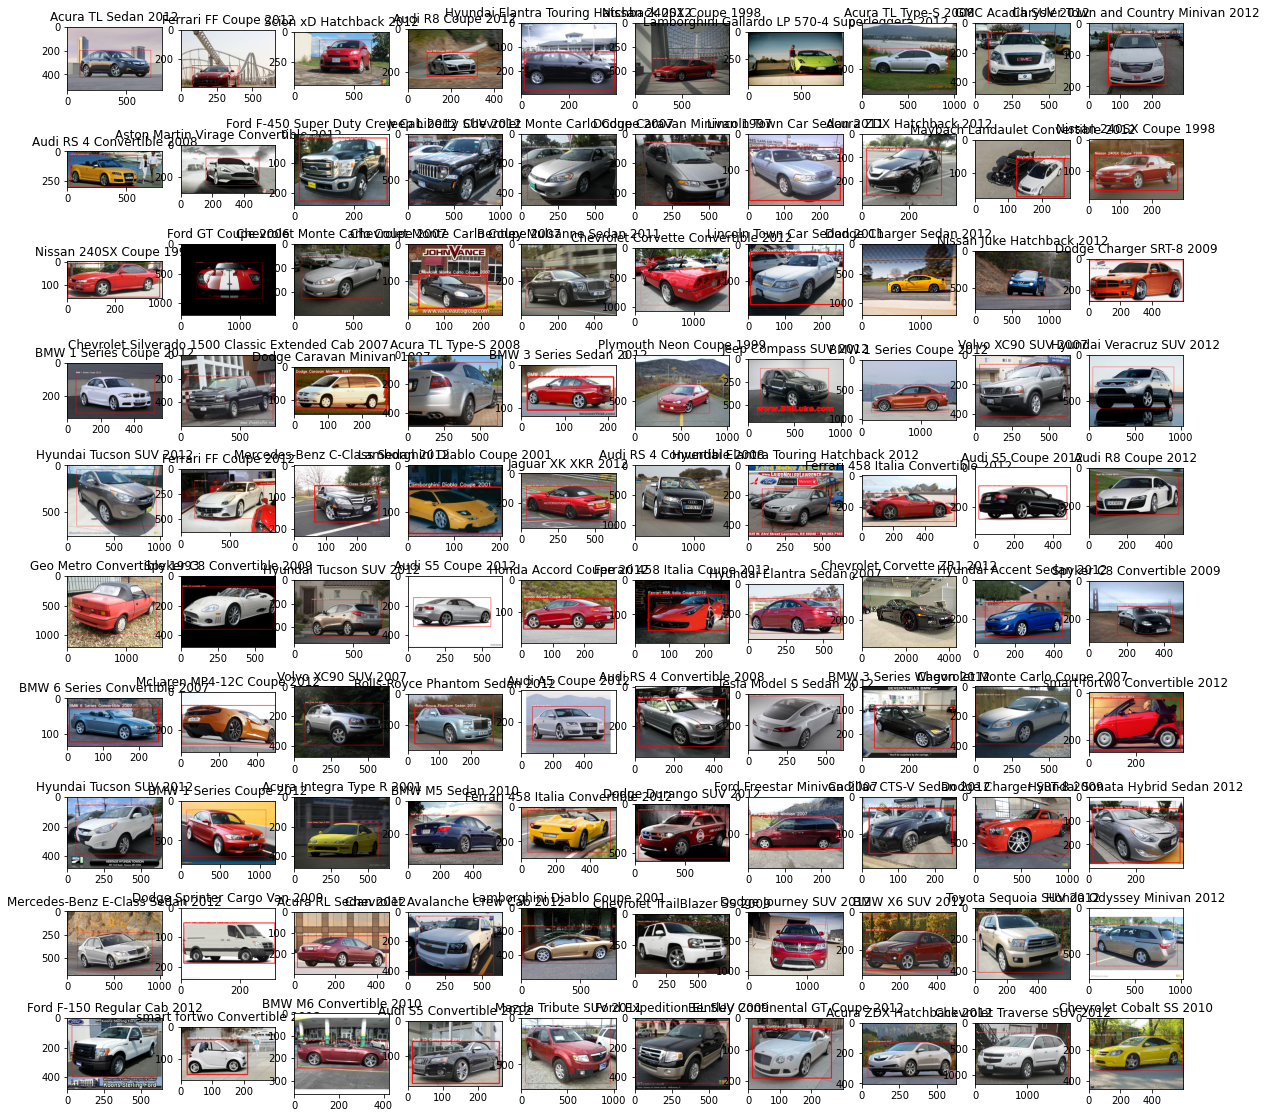

In [67]:
df_visualize = df_train.sample(100)
image_paths = list(df_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_visualize['Car_Name'])
bbox_list = list(df_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

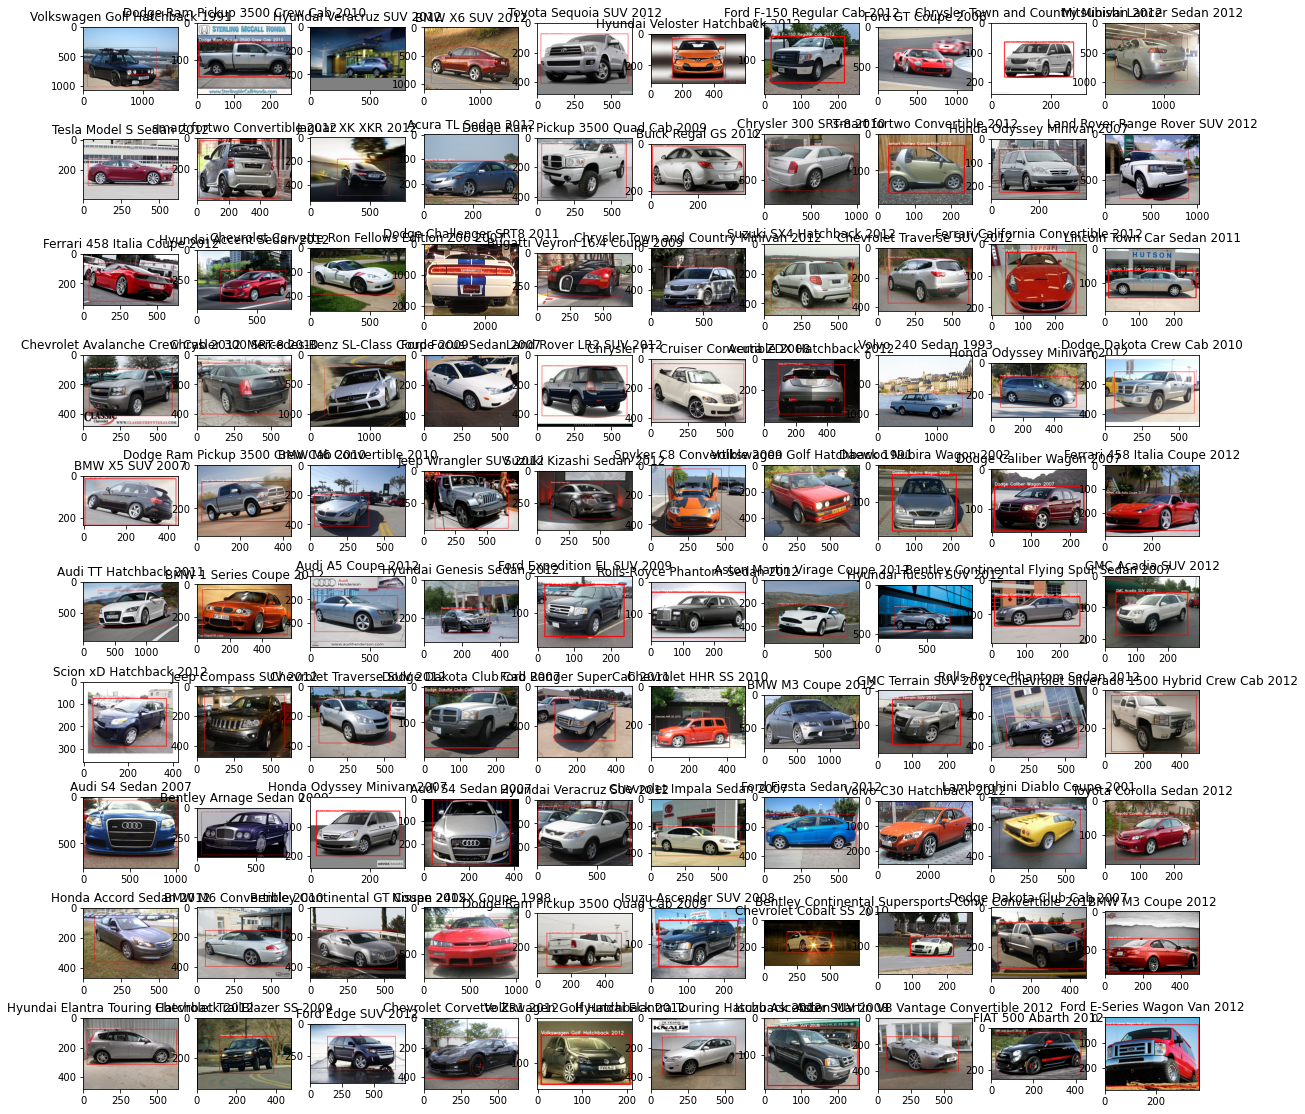

In [69]:
df_test_visualize = df_test.sample(100)
image_paths = list(df_test_visualize['Image_Path']) 
images = [read_image(p) for p in image_paths]
#images = np.array(df_visualize['Images'])
image_name = list(df_test_visualize['Car_Name'])
bbox_list = list(df_test_visualize['Bbox'])
image = visualize(images,bbox_list,image_name)
fig = plt.figure(figsize=(20, 20))
columns = 10
rows = 10

pics = []
for i in range(columns*rows):
    pics.append(fig.add_subplot(rows, columns, i+1,title=image_name[i]))
    plt.imshow(image[i])

plt.show() 

In [70]:
df_train.describe().transpose()

count           mean            std          min  \
Start_x          8144.0      64.906803      82.198684     1.000000   
Start_y          8144.0     108.661223     104.551635     1.000000   
End_x            8144.0     638.208620     410.776734    76.000000   
End_y            8144.0     416.431606     273.786000    47.000000   
Image_class      8144.0      98.979371      56.503148     1.000000   
Orig_img_height  8144.0     482.771979     317.580021    57.000000   
Orig_img_width   8144.0     699.793099     450.922445    78.000000   
Img_AR           8144.0       1.473561       0.232987     0.593066   
bb_width         8144.0     573.301817     375.675050    73.000000   
bb_height        8144.0     307.770383     213.463238    23.000000   
bb_AR            8144.0       1.951161       0.488941     0.559322   
img_area         8144.0  477026.917117  890130.689330  4524.000000   
bb_area          8144.0  249462.668713  494907.035699  1748.000000   

                           25%            50%            75%           max  
Start_x              19.000000      39.000000      79.000000  1.648000e+03  
Start_y              42.000000      80.000000     138.250000  1.508000e+03  
End_x               392.000000     569.000000     746.250000  5.205000e+03  
End_y               248.000000     360.000000     477.000000  3.389000e+03  
Image_class          50.000000      99.000000     148.000000  1.960000e+02  
Orig_img_height     290.000000     424.000000     540.000000  3.744000e+03  
Orig_img_width      429.000000     636.500000     800.000000  5.616000e+03  
Img_AR                1.333333       1.348485       1.519757  3.887538e+00  
bb_width            338.000000     504.000000     659.000000  4.156000e+03  
bb_height           173.000000     260.000000     370.000000  2.648000e+03  
bb_AR                 1.593023       1.867606       2.249385  3.975000e+00  
img_area         121240.000000  265752.000000  432363.750000  2.102630e+07  
bb_area           59735.000000  130497.000000  237495.750000  9.874656e+06

In [72]:
df_train['bb_area/img_area'] = df_train['bb_area']/df_train['img_area']
df_train.head(5)

Image_Name  Start_x  Start_y   End_x   End_y  Image_class  \
0  00001.jpg     39.0    116.0   569.0   375.0           14   
1  00002.jpg     36.0    116.0   868.0   587.0            3   
2  00003.jpg     85.0    109.0   601.0   381.0           91   
3  00004.jpg    621.0    393.0  1484.0  1096.0          134   
4  00005.jpg     14.0     36.0   133.0    99.0          106   

                                          Image_Path  \
0  C:\Users\uprak\capstone\Car Images\Train Image...   
1  C:\Users\uprak\capstone\Car Images\Train Image...   
2  C:\Users\uprak\capstone\Car Images\Train Image...   
3  C:\Users\uprak\capstone\Car Images\Train Image...   
4  C:\Users\uprak\capstone\Car Images\Train Image...   

                              Car_Name                            Bbox  \
0                  Audi TTS Coupe 2012     [39.0, 116.0, 569.0, 375.0]   
1                  Acura TL Sedan 2012     [36.0, 116.0, 868.0, 587.0]   
2           Dodge Dakota Club Cab 2007     [85.0, 109.0, 601.0, 381.0]   
3     Hyundai Sonata Hybrid Sedan 2012  [621.0, 393.0, 1484.0, 1096.0]   
4  Ford F-450 Super Duty Crew Cab 2012       [14.0, 36.0, 133.0, 99.0]   

   Orig_img_height  Orig_img_width    Img_AR  bb_width  bb_height     bb_AR  \
0              400             600  1.500000     530.0      259.0  2.046332   
1              675             900  1.333333     832.0      471.0  1.766454   
2              480             640  1.333333     516.0      272.0  1.897059   
3             1386            2100  1.515152     863.0      703.0  1.227596   
4              108             144  1.333333     119.0       63.0  1.888889   

   img_area   bb_area                                             Images  \
0    240000  137270.0  [[[101 119 123]\n  [ 98 116 120]\n  [ 93 111 1...   
1    607500  391872.0  [[[164 169 175]\n  [166 171 177]\n  [169 174 1...   
2    307200  140352.0  [[[231 231 231]\n  [244 244 244]\n  [234 234 2...   
3   2910600  606689.0  [[[255 255 255]\n  [255 255 255]\n  [255 255 2...   
4     15552    7497.0  [[[136 167 196]\n  [136 167 196]\n  [138 169 1...   

   bb_area/img_area  
0          0.571958  
1          0.645057  
2          0.456875  
3          0.208441  
4          0.482060

In [74]:
cols = list(df_train.columns)
cols

['Image_Name',
 'Start_x',
 'Start_y',
 'End_x',
 'End_y',
 'Image_class',
 'Image_Path',
 'Car_Name',
 'Bbox',
 'Orig_img_height',
 'Orig_img_width',
 'Img_AR',
 'bb_width',
 'bb_height',
 'bb_AR',
 'img_area',
 'bb_area',
 'Images',
 'bb_area/img_area']

In [75]:
df_eda = df_train[['Image_Name','Image_class','Bbox','Orig_img_width','Orig_img_height','Img_AR','bb_width','bb_height','bb_AR',
                  'img_area','bb_area','bb_area/img_area']]

In [76]:
df_eda.sample(10)

Image_Name  Image_class                          Bbox  Orig_img_width  \
6437  06438.jpg           72   [52.0, 105.0, 612.0, 327.0]             640   
5301  05302.jpg          151    [56.0, 79.0, 552.0, 251.0]             600   
4340  04341.jpg           91    [48.0, 34.0, 400.0, 243.0]             400   
1251  01252.jpg          196    [19.0, 25.0, 386.0, 242.0]             400   
853   00854.jpg           71    [45.0, 41.0, 420.0, 280.0]             434   
4190  04191.jpg           16   [43.0, 104.0, 550.0, 299.0]             576   
45    00046.jpg           25    [28.0, 80.0, 759.0, 466.0]             786   
32    00033.jpg           66  [34.0, 197.0, 1011.0, 656.0]            1024   
7058  07059.jpg           19     [3.0, 80.0, 638.0, 410.0]             640   
816   00817.jpg          143    [28.0, 96.0, 477.0, 317.0]             500   

      Orig_img_height    Img_AR  bb_width  bb_height     bb_AR  img_area  \
6437              428  1.495327     560.0      222.0  2.522523    273920   
5301              315  1.904762     496.0      172.0  2.883721    189000   
4340              266  1.503759     352.0      209.0  1.684211    106400   
1251              250  1.600000     367.0      217.0  1.691244    100000   
853               326  1.331288     375.0      239.0  1.569038    141484   
4190              369  1.560976     507.0      195.0  2.600000    212544   
45                492  1.597561     731.0      386.0  1.893782    386712   
32                768  1.333333     977.0      459.0  2.128540    786432   
7058              480  1.333333     635.0      330.0  1.924242    307200   
816               375  1.333333     449.0      221.0  2.031674    187500   

       bb_area  bb_area/img_area  
6437  124320.0          0.453855  
5301   85312.0          0.451386  
4340   73568.0          0.691429  
1251   79639.0          0.796390  
853    89625.0          0.633464  
4190   98865.0          0.465151  
45    282166.0          0.729654  
32    448443.0          0.570225  
7058  209550.0          0.682129  
816    99229.0          0.529221

<AxesSubplot:xlabel='Img_AR', ylabel='Count'>

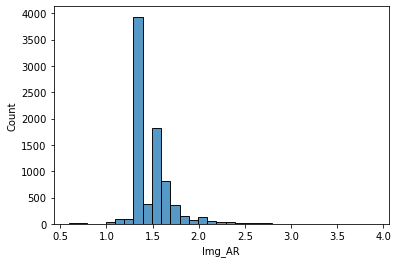

In [80]:
sns.histplot(data=df_eda,x='Img_AR',binwidth=0.1)

In [92]:
np.mean(np.array(df_eda['Img_AR']))

1.4735606114201925

<AxesSubplot:xlabel='bb_AR', ylabel='Count'>

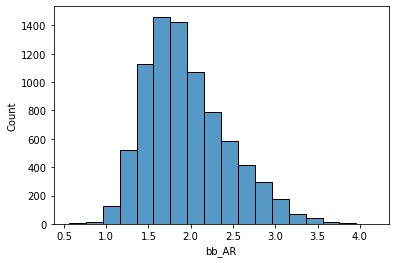

In [115]:
sns.histplot(data=df_eda,x='bb_AR',binwidth=0.2)

In [94]:
df_group.sample(5)

Start_x     Start_y        End_x       End_y  Orig_img_height  \
Image_class                                                                     
55            60.325000  163.350000   810.050000  493.875000       590.900000   
24            53.688889  107.711111   610.333333  411.955556       476.577778   
52            56.585366   81.146341   533.463415  351.024390       401.463415   
135           53.476190   91.023810   555.595238  376.714286       435.666667   
164          137.295455  260.818182  1209.568182  774.704545       892.727273   

             Orig_img_width    Img_AR     bb_width   bb_height     bb_AR  \
Image_class                                                                
55               866.125000  1.517962   749.725000  330.525000  2.441710   
24               666.644444  1.422002   556.644444  304.244444  1.872467   
52               588.073171  1.491031   476.878049  269.878049  1.816733   
135              606.119048  1.415774   502.119048  285.690476  1.861920   
164             1328.795455  1.475294  1072.272727  513.886364  2.138562   

                 img_area        bb_area  
Image_class                               
55           6.829287e+05  331948.950000  
24           4.015566e+05  214429.866667  
52           2.985589e+05  166741.268293  
135          3.137829e+05  170349.047619  
164          1.328097e+06  620757.000000

In [99]:
#df_group.reset_index(inplace=True)
df_group

Image_class     Start_x     Start_y       End_x       End_y  \
0              1   33.355556   67.333333  449.688889  306.000000   
1              2   69.718750  113.250000  633.250000  380.281250   
2              3   63.953488   99.046512  657.558140  419.860465   
3              4   50.380952  131.261905  673.285714  435.357143   
4              5   47.195122   95.853659  486.926829  313.414634   
..           ...         ...         ...         ...         ...   
191          192  116.395349  163.162791  912.906977  600.930233   
192          193   83.833333  113.166667  693.047619  454.404762   
193          194   84.391304  123.260870  787.304348  485.195652   
194          195   54.674419   74.581395  550.883721  367.627907   
195          196   62.750000   70.550000  553.850000  391.575000   

     Orig_img_height  Orig_img_width    Img_AR    bb_width   bb_height  \
0         338.777778      491.133333  1.488229  416.333333  238.666667   
1         444.343750      694.250000  1.626136  563.531250  267.031250   
2         482.976744      714.046512  1.490232  593.604651  320.813953   
3         505.428571      720.023810  1.427891  622.904762  304.095238   
4         370.536585      529.878049  1.467877  439.731707  217.560976   
..               ...             ...       ...         ...         ...   
191       699.348837     1021.767442  1.480585  796.511628  437.767442   
192       517.261905      778.547619  1.541277  609.214286  341.238095   
193       566.913043      837.391304  1.539087  702.913043  361.934783   
194       409.813953      595.023256  1.478335  496.209302  293.046512   
195       426.250000      623.525000  1.462446  491.100000  321.025000   

        bb_AR       img_area        bb_area  
0    1.733447  339422.000000  185725.533333  
1    2.193562  421385.937500  192106.718750  
2    1.999234  510487.860465  294358.186047  
3    2.079940  416349.880952  211456.714286  
4    2.016969  346084.951220  169860.097561  
..        ...            ...            ...  
191  1.924556  825807.209302  433913.860465  
192  1.873040  487950.666667  241788.619048  
193  2.088240  537252.239130  285973.065217  
194  1.713090  288334.674419  171179.627907  
195  1.526207  373605.325000  218841.350000  

[196 rows x 13 columns]

In [100]:
df_group['Car_Name'] = df_group['Image_class'].apply(lambda x:car_dict[int(x)])

<AxesSubplot:xlabel='Image_class', ylabel='bb_area'>

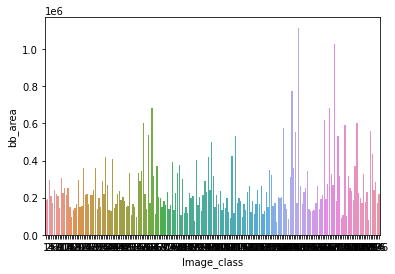

In [114]:
sns.barplot(data=df_group,x='Image_class',y='bb_area')